## Algorithm Programming Assignment \#1
***
학과 : 소프트웨어융합학과<br>
학번_이름 : B889047 윤준호

**\[ 실험 진행환경 \]**

- OS : Mac OS Monteray(ver 12.3)
- Language : Python3, IPython(Run with Rosetta2)
- Python Interpreter Version : Python 3.8.9
- IDE : Pycharm Professional, Jupyter Notebook
- CPU : Apple M1(ARM Architecture)
***
### Problem
Implement three versions of Quicksort algorithm in a programming language you choose:

1. Iterative Quicksort : 일반순회 퀵정렬
2. Recursive Quicksort : 재귀적 퀵정렬
3. Randomized Quicksort : 랜덤피벗 퀵정렬

Insert a counter of comparison incremented whenever two elements are compared in the algorithms.
***
### Input / Output Conditions
**Input data: randomly generate a set of data as follows – pseudocode below**

```pseudocode
for i = 10**2, 10**4, 10**6, 10**8, ... ( until your computer can do ) 
    for j = 1, 2, ..., 20
        a_set_i_j = {x | x=random[1..i] i times}
```

**Output: Draw a plot with the numbers of comparison operations for each data set from the three versions of the algorithm**

### 사용할 Python Packagages

- json : main.py에서 저장한 결괴 json파일을 읽어오기 위해서 사용
- pandas : DataFrame사용을 위해서 사용
    - Version : 1.4.0
- matplotlib : Data Visualization을 위해 사용(직접적인 사용은 하지 않으나, Pandas plot의 반환객체로 matplotlib.plot을 사용함)
    - Version : 3.5.1

In [1]:
import json
import pandas as pd
import matplotlib as plt

## benchmark.py 실행
***

### 주어진 조건은 아래와 같았다

**외부 for문을 살펴보자. i는 결론적으로 범위이다.(1 ~ i) 그리고 내부 for문을 살펴보자. j는 총 20개의 데이터 셋을 만들라는 의미를 지닌 카운팅 변수이다. 즉 각 범위(i)에 대해서 i개를 랜덤으로 뽑는 총 20개의 데이터셋을 만들면 되는것으로 해석하였다**
***
### 데이터셋 제작 함수

main.py에서는 데이터 셋을 만든 후 **Iterative QuickSort**, **Recursive QuickSort**, **Randomized QuickSort**들에 대해 case별로 benchmarking을 진행하고 **벤치마킹 결과들(수행 시간과 각 단계별 Comparison Count) result.json과 벤치마킹에 사용된 테스트 데이터셋이 저장된 Used_test_case.json, 총 두개의 파일을 저장한다.**. 데이터셋 생성 알고리즘은 아래와 같다.

```python3

# Defined as class method
test_set = list(map(int, [math.pow(10, 2), math.pow(10, 4), math.pow(10, 6)]))

# Defined as instance method
# Generate Test case
def generateTestSet(self) -> None:
    res = dict()
    for p, i in enumerate(algorithm_tester.test_set):
        sets = list()
        for _ in range(1, 21):
            arr = [random.randint(1,i) for _ in range(i)]
            sets.append(arr)
        res[f"Test_case_{p + 1}"] = sets
    self.testCase = res
```

벤치마킹을 위해서는 **모든 알고리즘이 동일한 테스트 셋을 통해서 테스트가 이루어 져야 한다.**. 그렇기 때문에 테스트 데이터셋 제작 알고리즘을 분리하였다. 기본적인 알고리즘은 아래와 같다.

### 알고리즘 성능 벤치마킹 함수

각 정렬별 벤치마킹하는 메소드는 'algorithm_tester.test_data'에 정의되어있다. 소스코드는 아래와 같다. 이 메소드는 위에서 생성한 데이터 셋을 기반으로 벤치마킹 한다. 시간 측정은 [time모듈](https://docs.python.org/3/library/time.html)을 이용한다. 더 정확한 측정을 위해서 time()메소드나 process_time()메소드 대신 [perf_counter()](https://docs.python.org/3/library/time.html#time.perf_counter)메소드를 사용한다.(perf_counter()는 대기시간까지 포함하여 프로세스 실행시간을 측정한다.)

```python3
    def test_data(self,sortingInstance : utility,caseName:str,substractOneEndIndex:bool=False) -> None:
        result = dict()
        # 테스트 데이터를 복사하여 정렬을 한다.
        copy_test = copy.deepcopy(self.testCase)

        for p, i in copy_test.items():
            # Initiate essential variables
            arr = []
            previous = []
            resultCapsule = dict()
            for j,l in enumerate(i):
                arr = l
                previous = arr[:]  # Deep Copy random testset. This may occur overhead while testing

                # Time estimate start
                start = time.perf_counter()

                if substractOneEndIndex:
                    sortingInstance.sort(arr,0, len(arr)-1)  # Get comparison count as result value
                else:
                    sortingInstance.sort(arr, 0, len(arr))

                # Time estimate end
                end = time.perf_counter() - start

                resultCapsule[f"GroupSet_{j+1}"] = {
                    "SortingTime": end,
                    "comparisonCount": sortingInstance.getComparisonCount()
                }
                # 각 테스트 케이스마다 comparison count를 비워준다.
                sortingInstance.clearComparisonCount()
            result[f"{p}"] = resultCapsule

        self.resultJSON[caseName] = result
```



In [2]:
!python3 benchmark.py

Generating Test Data Sets...

Benchmarking : Recursive Quick Sort... 

Benchmarking : Iterative Quick Sort... 

Benchmarking : Randomized Quick Sort... 


Convert Test Case to JSON...

Convert Result to JSON...

Benchmark Complete! Total execution time 262.70sec


### 결과 JSON이 포함하고 있는 내용

***
각 용어가 의미하고 있는것은 아래와 같다.

\[ Test Case 이름 \]
- Test_case_1 : 10^2 범위

- Test_case_2 : 10^4 범위

- Test_case_3 : 10^6 범위

\[ GroupSet 이름 \]

- GroupSet_? : 데이터셋 번호

***

#### JSON 데이터는 아래와 같은 형태로 데이터를 저장하고 있다.

- Quick Sort 종류
    - Test_case_?
        - GroupSet_?
            - 정렬에 걸린 시간
            - 정렬이전의 배열
            - 정렬 이후의 배열
            - 비교연산 횟수

In [3]:
read_result = None
with open('result.json','r') as res:
    read_result = json.load(res)

## JSON결과를 전처리 함수 및 데이터프레임 제작 함수 선언하기 
***

#### returnDatasForDataframe

\[ parameters \]

- res_set : dict - result.json에서 전치리하고자 하는 정렬알고리즘의 필드 

- algorithmname : str - 알고리즘 이름

***

\[ Descriptions \]

main.py를 실행하여 얻은 JSON결과에 대해 전처리를 진행한다. 반환타입은 딕셔너리이며, 반환타입 필드는 아래와 같은 의미를 가진다

- label : 정렬 알고리즘 이름(Recursive,Randomized...etc)
- test_case_number : 테스트 케이스 번호
- group_set_number : 랜덤 테스트셋 번호
- sortingtime : 정렬에 걸린 시간
- comparisonCount : 비교연산횟수

#### returnDataFrame

\[  parameters \]

- preprocess_result : dict - 전처리 결과를 넘겨받는다.

\[ Descriptions \]

넘겨받은 전처리 결과를 기반으로 데이터 프레임을 만든다. 반환타입은 pandas.DataFrame이다.

In [4]:
# Define string name field : Prevent Hard Coding
# 추후 인덱싱 작업에서 하드코딩을 방지하기 위해서 변수로 라벨을 바인드하고 시작한다.
recursiveName = "Recursive"
randomizedName = "Randomized"
iterativeName = "Iterative"


def returnDatasForDataframe(res_set:dict,algorithmname:str) -> dict:
    res = {
        "label" : [],
        "test_case_number" : [],
        "group_set_number" : [],
        "sortingtime" : [],
        "comparisonCount" : []
    }
    for i,j in res_set.items():
        for p,q in j.items():
            res["label"].append(algorithmname)
            res["test_case_number"].append(i)
            res["group_set_number"].append(p)
            res["sortingtime"].append(q["SortingTime"])
            res["comparisonCount"].append(q["comparisonCount"])
    return res  

def returnDataFrame(preprocess_result:dict) -> pd.DataFrame:
    df = pd.DataFrame({
        "Algorithm Type" : preprocess_result["label"],
        "Test Case Number" : preprocess_result["test_case_number"],
        "Group set Name" : preprocess_result["group_set_number"],
        "Sorting Time" : preprocess_result["sortingtime"],
        "Comparison Count" : preprocess_result["comparisonCount"]
    })
    return df

### Recursive Quick Sort 데이터 전처리 및 데이터 프레임 변환

In [5]:
#Before Preprocess
recursive_result_set = read_result[recursiveName]
#After Preprocess
recursive_preprocess_result = returnDatasForDataframe(recursive_result_set,recursiveName)

#DataFrame
recursive_df = returnDataFrame(recursive_preprocess_result)

### Iterative Quick Sort 데이터 전처리 및 데이터 프레임 변환

In [6]:
# Before Preprocess
iterative_result_set = read_result[iterativeName]

# After Preprocess
iterative_preprocess_result = returnDatasForDataframe(iterative_result_set,iterativeName)

#DataFrame
iterative_df = returnDataFrame(iterative_preprocess_result)

### Randomized Quick Sort 데이터 전처리 및 데이터 프레임 변환

In [7]:
# Before Preprocess
randomized_result_set = read_result[randomizedName]

# After Preprocess
randomized_preprocess_result = returnDatasForDataframe(randomized_result_set,randomizedName)

#DataFrame
randomized_df = returnDataFrame(randomized_preprocess_result)

### 데이터 프레임 합치기
***
위에서 구한 데이터 프레임을 합친다. 합칠때는 행 방향(세로)으로 concatenation을 진행해 준다. concatenation을 진행해 주기 위해서는 pandas의 concat() 함수를 사용해 준다. concat()함수에는 총 두가지 매개변수가 들어간다

- param1 : Dataframes embeded MutableSequence
- param2 : axis
    - axis=0 : 행 기준으로 합친다(세로)
    - axis=1 : 열 기준으로 합친다(가로)

In [8]:
total_result = pd.concat([recursive_df,iterative_df,randomized_df],axis=0)

In [9]:
total_result

,Algorithm Type,Test Case Number,Group set Name,Sorting Time,Comparison Count
0,Recursive,Test_case_1,GroupSet_1,0.000150,598
1,Recursive,Test_case_1,GroupSet_2,0.000146,638
2,Recursive,Test_case_1,GroupSet_3,0.000145,641
3,Recursive,Test_case_1,GroupSet_4,0.000147,666
4,Recursive,Test_case_1,GroupSet_5,0.000140,625
...,...,...,...,...,...
55,Randomized,Test_case_3,GroupSet_16,2.659061,5298608
56,Randomized,Test_case_3,GroupSet_17,2.643778,5341728
57,Randomized,Test_case_3,GroupSet_18,2.634659,5320063
58,Randomized,Test_case_3,GroupSet_19,2.640667,5319734


## 결과가 잘 나왔는지 그룹화 해보기
***
위 결과가 잘 합쳐졌는지 그룹화를 하여 확인해 보자. 잘 합쳐졌다면 각 테스트 케이스 별로 20개의 행을 가지고 있어야 한다

In [10]:
total_result.groupby(["Algorithm Type","Test Case Number"]).count()

Group set Name  Sorting Time  \
Algorithm Type Test Case Number                                 
Iterative      Test_case_1                   20            20   
               Test_case_2                   20            20   
               Test_case_3                   20            20   
Randomized     Test_case_1                   20            20   
               Test_case_2                   20            20   
               Test_case_3                   20            20   
Recursive      Test_case_1                   20            20   
               Test_case_2                   20            20   
               Test_case_3                   20            20   

                                 Comparison Count  
Algorithm Type Test Case Number                    
Iterative      Test_case_1                     20  
               Test_case_2                     20  
               Test_case_3                     20  
Randomized     Test_case_1                     20  
               Test_case_2                     20  
               Test_case_3                     20  
Recursive      Test_case_1                     20  
               Test_case_2                     20  
               Test_case_3                     20

## 테스트 케이스 별로 필터링 하여 plot그리기
***
세가지 테스트 케이스가 있었다

- 1 ~ 10^2 까지의 범위
- 1 ~ 10^4 까지의 범위
- 1 ~ 10^6 까지의 범위

이 각 케이스 별로 데이터 프레임을 필터링 한 후 그래프를 그려보자. 필터링을 할때는 아래 함수들을 사용해서 진행한다

- groupby
- loc()
- pandas.DataFrame.plot()

## Test Case 1에 대한 그래프
***

### Comparison Operation Count 데이터에 대한 Visualization

**범위는 1 ~ 10^2**이다. x 축은 랜덤 표본 개수를 의미하고, y축은 비교 횟수를 의미한다

In [11]:
# Test Case 1에 대한 필터링
filter_testcase_1 = total_result.loc[total_result["Test Case Number"] == 'Test_case_1']
# Index를 각 Group_Set_Name으로 변경
filter_testcase_1 = filter_testcase_1.set_index("Group set Name")
title="Test Case 1(Range : 1 ~ 10^2) Comparison Operation CountResult"
title2="Test Case 1(Range : 1 ~ 10^2) SortingTime Result"

Algorithm Type  Test Case Number
Iterative       Test_case_1         AxesSubplot(0.125,0.125;0.775x0.755)
Randomized      Test_case_1         AxesSubplot(0.125,0.125;0.775x0.755)
Recursive       Test_case_1         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Comparison Count, dtype: object

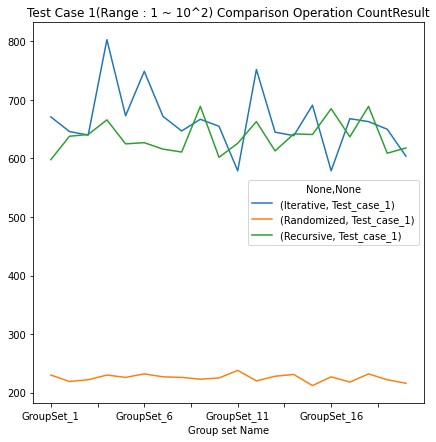

In [12]:
# dataframe.plot() 의 옵션중 use_index = True를 해주면, index를 x축으로 사용한다

filter_testcase_1.groupby(['Algorithm Type','Test Case Number'])['Comparison Count'].plot(
    use_index=True,
    legend=True,
    figsize=(7,7),
    title=title)

### Sorting Time(수행시간)에 대한 Visualization

x축은 랜덤 표본 개수이고, y축은 실행 시간이다.

Algorithm Type  Test Case Number
Iterative       Test_case_1         AxesSubplot(0.125,0.125;0.775x0.755)
Randomized      Test_case_1         AxesSubplot(0.125,0.125;0.775x0.755)
Recursive       Test_case_1         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sorting Time, dtype: object

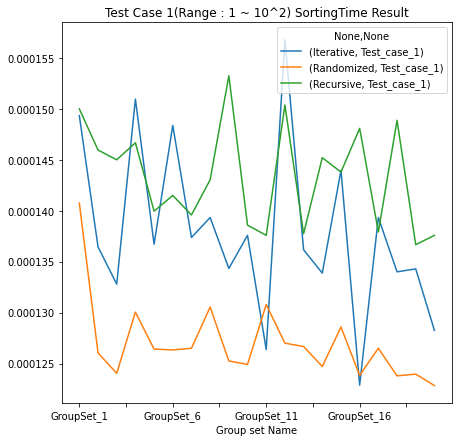

In [13]:
filter_testcase_1.groupby(['Algorithm Type','Test Case Number'])['Sorting Time'].plot(
    use_index=True,
    legend=True,
    figsize=(7,7),
    title=title2)

## Test Case 2에 대한 그래프
***

### Comparison Operation Count 데이터에 대한 Visualization

**범위는 1 ~ 10^4**이다. x 축은 랜덤 표본 개수를 의미하고, y축은 비교 횟수를 의미한다

In [14]:
# Test Case 1에 대한 필터링
filter_testcase_2 = total_result.loc[total_result["Test Case Number"] == 'Test_case_2']
filter_testcase_2 = filter_testcase_2.set_index("Group set Name")
title="Test Case 2(Range : 1 ~ 10^4) Comparison Operation CountResult"
title2="Test Case 2(Range : 1 ~ 10^4) SortingTime Result"

Algorithm Type  Test Case Number
Iterative       Test_case_2         AxesSubplot(0.125,0.125;0.775x0.755)
Randomized      Test_case_2         AxesSubplot(0.125,0.125;0.775x0.755)
Recursive       Test_case_2         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Comparison Count, dtype: object

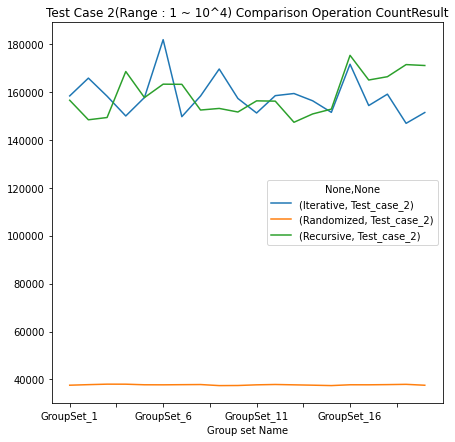

In [15]:
filter_testcase_2.groupby(['Algorithm Type','Test Case Number'])['Comparison Count'].plot(
    use_index=True,
    legend=True,
    figsize=(7,7),
    title=title)

### Sorting Time(수행시간)에 대한 Visualization

x축은 랜덤 표본 개수이고, y축은 실행 시간이다.

Algorithm Type  Test Case Number
Iterative       Test_case_2         AxesSubplot(0.125,0.125;0.775x0.755)
Randomized      Test_case_2         AxesSubplot(0.125,0.125;0.775x0.755)
Recursive       Test_case_2         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sorting Time, dtype: object

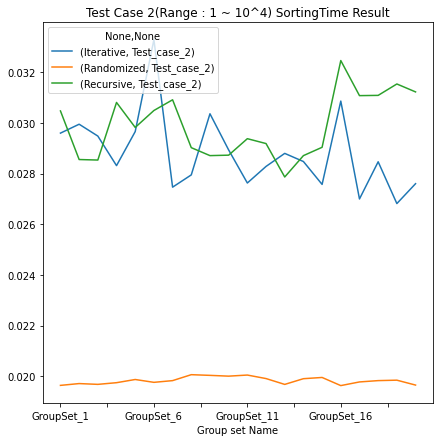

In [16]:
filter_testcase_2.groupby(['Algorithm Type','Test Case Number'])['Sorting Time'].plot(
    use_index=True,
    legend=True,
    figsize=(7,7),
    title=title2)

## Test Case 3에 대한 그래프
***

### Comparison Operation Count 데이터에 대한 Visualization

**범위는 1 ~ 10^6**이다. x 축은 랜덤 표본 개수를 의미하고, y축은 비교 횟수를 의미한다

In [17]:
# Test Case 1에 대한 필터링
filter_testcase_3 = total_result.loc[total_result["Test Case Number"] == 'Test_case_3']
filter_testcase_3 = filter_testcase_3.set_index("Group set Name")
title="Test Case 3(Range : 1 ~ 10^6) Comparison Operation CountResult"
title2="Test Case 3(Range : 1 ~ 10^6) SortingTime Result"

Algorithm Type  Test Case Number
Iterative       Test_case_3         AxesSubplot(0.125,0.125;0.775x0.755)
Randomized      Test_case_3         AxesSubplot(0.125,0.125;0.775x0.755)
Recursive       Test_case_3         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Comparison Count, dtype: object

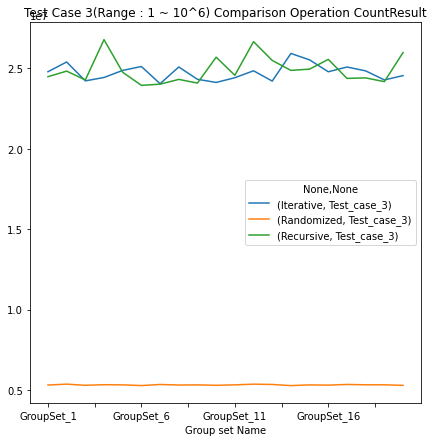

In [18]:
filter_testcase_3.groupby(['Algorithm Type','Test Case Number'])['Comparison Count'].plot(
    use_index=True,
    legend=True,
    figsize=(7,7),
    title = title)

### Sorting Time(수행시간)에 대한 Visualization

x축은 랜덤 표본 개수이고, y축은 실행 시간이다.

Algorithm Type  Test Case Number
Iterative       Test_case_3         AxesSubplot(0.125,0.125;0.775x0.755)
Randomized      Test_case_3         AxesSubplot(0.125,0.125;0.775x0.755)
Recursive       Test_case_3         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sorting Time, dtype: object

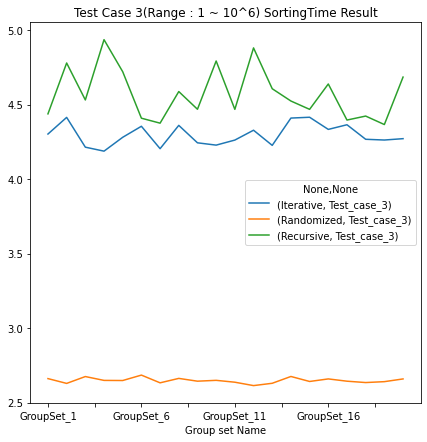

In [19]:
filter_testcase_3.groupby(['Algorithm Type','Test Case Number'])['Sorting Time'].plot(
    use_index=True,
    legend=True,
    figsize=(7,7),
    title=title2)

## Result
***
결과를 살펴보자. 결과는 실행시간적인 측면과, 비교연산적 관점을 기준으로 살펴본다.

### 실행시간 관점

실행시간 측면에 있어서 결국 Iterative QuickSort, Randomized QuickSort, Recursive QuickSort모두 평균적으로 O(nlogn), 최악으로 O(n^2)을 가지게 된다. 그래프로 알 수 있듯이 이 세가지 정렬 모두 비슷한 수행시간을 보이는것을 알 수 있다. 다만, Test case3의 실행시간 그래프와 Test case 2의 그래프를 비교해 보면서, 데이터의 개수가 더 늘어날 수록 Randomized QuickSort의 실행시간이 더 빠르지 않을까 라는 생각이 들었다.

### 비교연산횟수 관점

비교 연산횟수 관점에서 보면 Iterative QuickSort와 Recursive QuickSort 두 방법은 어느정도 비슷한 비교 횟수를 가지고 있는것을 알 수 있다. 반면에 Randomized QuickSort는 위 두가지 방법에 비해 현저히 적은 비교횟수를 가지고 있는것을 알 수 있다.